# INFO371 Homework: Neural Networks and Support Vector Machines

Your task for this assignment is to explore a dataset using both neural networks and SVMs in order to give you some experience with hyperparameter tuning and visualizing decision boundaries. You'll want to make sure you are familiar with the documentation for both methods before starting the assignment. 

## Data
In this assignment, you will work with a dataset to try to predicit whether someone is at high or low risk of having a heart attack given some general health information about each person. The dataset has the following features: 

* Age : Age of the patient
* Sex : Sex of the patient (0 = Male, 1 = Female)
* exang: exercise induced angina (1 = yes; 0 = no)
* caa: number of major vessels (0-3)
* cp : Chest Pain type
     * Value 0: typical angina
     * Value 1: atypical angina
     * Value 2: non-anginal pain
     * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    * 0 = unsloping
    * 1 = flat
    * 2 = downsloping
* thall : thalassemia
    * 0 = null
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
* output : 0= less chance of heart attack 1= more chance of heart attack

Note that the column "output" is your label (i.e. the thing you are trying to predict). 

---
For some more information on some of the health definitions: 
* [Angina](https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems): chest pain due to reduced blood flow to the heart muscles. There're 3 types of angina: stable angina, unstable angina, and variant angina.

* ECG: short for electrocardiogram, it's a routine test usually done to check the heart's electrical activity.

* [ST depression](https://litfl.com/st-segment-ecg-library/): a type of ST-segment abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization.

* Thalassemia: is a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import random
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

## Dataset Exploration and Experiment Set-Up

1. load the dataset and ensure it looks good 


2. Plot your data using PCA to reduce the dimensions to a 2D space. Make sure to color each point in the dataset occording to each label/output.  


In [209]:
# code goes here
#1
df = pd.read_csv("heart.csv.bz2")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [210]:
print(df.shape)
print(df.isna().sum())

(303, 14)
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


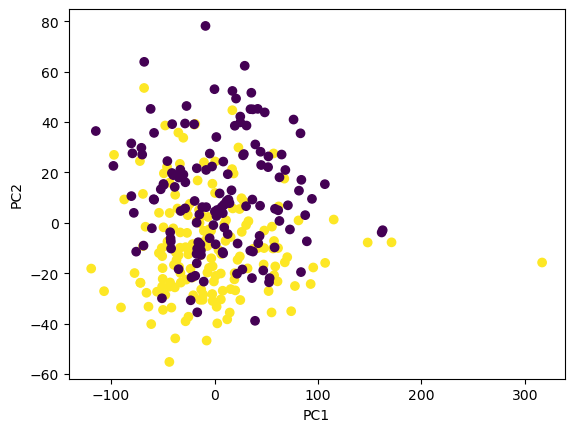

In [211]:
#2
X = df.loc[:, ~df.columns.isin(['output'])] 
y = df.output

principal = PCA(n_components=2)
X_pca = principal.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Running Neural Networks

3. Using the default parameters, train a Neural Networl model and examine the examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. For an idea on how to do this, take a look at some of the lecture code we’ve done in class. Please don't use the cross-validation function here -- we want you to write this part yourself. 

    Hint – its probably a good idea to write a function to do this since you will be using this code to tune the various parameters. 
    
    Hint - you are welcome to use any code from previous homework assignments. 


4. Now lets examine what happens as you increase the complexity of the model. Tune the model by examining various numers of layers (and number of nodes at each layer) to try to get the best possible accuracy. The hidden_layer_sizes parameter accepts a set where the length is the number of hidden layers and each element is the number of nodes in each layer. For example if I set as hidden_layer_sizes=(5, 2, 3) then my neural network will have 3 hidden layers where the first layer has 5 nodes, the second 2 nodes, and the third has 3 nodes. max-tree-depth. 

5. Plot the __average__ training and testing accuracy as you increase the number of total nodes in your model. (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 3 to get this score). Accuracy should be on the y-axis and number of nodes should be on the x-axis. 



6. Now plot the __average__ training and testing accuracy as you increase the number of layers in your model. (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 3 to get this score). Accuracy should be on the y-axis and number of layers should be on the x-axis. 



7. Using these figures, explain when your model is overfitting and underfitting. 


8. EXTRA CREDIT (5pts) -- Experiment with regularization (through different alpha terms) to combat overfitting. Use average test/train accuracy scores to find the best alpha values. Be sure to compare overall performance (both with repect to over/underfitting and the impact on model accuracy) with your non-regularized model from above.  


In [212]:
#code goes here
#3
def itr_nn(size):  
    train_score = []
    test_score = []
    for i in range(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        clf = MLPClassifier(hidden_layer_sizes = size)
        clf.fit(X_train, y_train)
        train_score.append(clf.score(X_train, y_train)) 
        test_score.append(clf.score(X_test, y_test))
    ave_train = np.sum(train_score) / len(train_score)
    ave_test = np.sum(test_score) / len(test_score)
    train_std = np.std(train_score)
    test_std = np.std(test_score)
    return ave_train, train_std, ave_test, test_std

ave_train, train_std, ave_test, test_std = itr_nn((100,))

print(ave_train, train_std, ave_test, test_std)

0.8278236914600552 0.027767720481221277 0.7846994535519125 0.04631610950910838


In [213]:
#4-find the hidden_layer_sizes that produces the best accuracy
def best_layer():
    cur_train = 0
    cur_test = 0
    cur_train_std = 0
    cur_test_std = 0
    best_size = ()
    for i in range(15):
        l_size = (random.randint(1, 9), random.randint(1, 9), random.randint(1, 9)) #generate random 3-tuple hidden_layer_sizes
        ave_train, train_std, ave_test, test_std = itr_nn(l_size)
        if((cur_train < ave_train) & (cur_test < ave_test)): #test and find the best accuracy with the given layer_sizes
            cur_train = ave_train
            cur_train_std = train_std
            cur_test = ave_test
            cur_test_std = test_std
            best_size = l_size
    print("hidden_layer_sizes = " + str(best_size) + ": ")
    print(cur_train, cur_train_std, cur_test, cur_test_std)
    
best_layer()

hidden_layer_sizes = (9, 8, 6): 
0.6699724517906336 0.07428623801091326 0.6666666666666666 0.0686874595080685


Increasing the values in the `hidden_layer_sizes` parameter results in a relatively improved accuracy in the model.

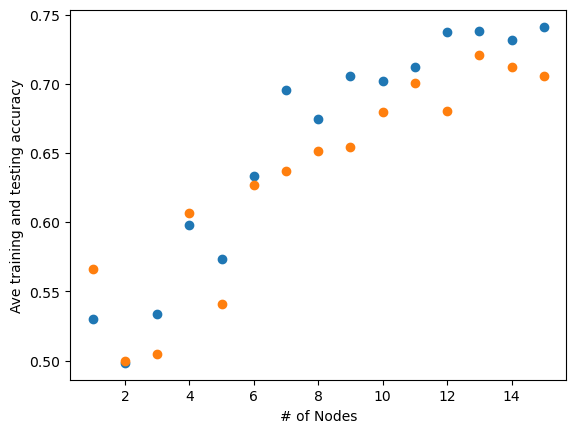

In [214]:
#5
def plt_node():
    train_score = []
    test_score = []
    nodes = []
    for i in range(15):
        l_size = (i+1, i+1, i+1)
        ave_train, train_std, ave_test, test_std = itr_nn(l_size)
        train_score.append(ave_train)
        test_score.append(ave_test)
        nodes.append(i+1)
    plt.scatter(x = nodes, y = train_score)
    plt.scatter(x = nodes, y = test_score)
    plt.xlabel('# of Nodes')
    plt.ylabel('Ave training and testing accuracy')
    
plt_node()

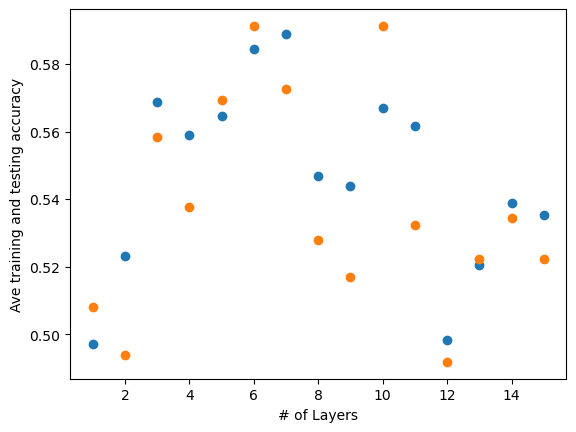

In [215]:
#6
def plt_layer():
    train_score = []
    test_score = []
    l_size = ()
    layers = []
    for i in range(15):
        l_size = l_size + ((random.randint(1, 9)),)
        ave_train, train_std, ave_test, test_std = itr_nn(l_size)
        train_score.append(ave_train)
        test_score.append(ave_test)
        layers.append(i+1)
    plt.scatter(x = layers, y = train_score)
    plt.scatter(x = layers, y = test_score)
    plt.xlabel('# of Layers')
    plt.ylabel('Ave training and testing accuracy')
    
plt_layer()

In [216]:
#7

Increasing the number of nodes results in underfitting, as indicated by the graph, which shows that the accuracy of training and testing data does not converge. Conversely, increasing the number of layers results in a slight overfitting, as the accuracy gaps between the training and testing data gradually widen.

In [217]:
#8
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

def itr_nn_alpha(alphas):
    ave_train = []
    ave_test = []
    for a in alphas:
        train_score = []
        test_score = []
        for i in range(15):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
            clf = MLPClassifier(alpha = a)
            clf.fit(X_train, y_train)
            train_score.append(clf.score(X_train, y_train)) 
            test_score.append(clf.score(X_test, y_test))
        ave_train.append((np.sum(train_score) / len(train_score)))
        ave_test.append((np.sum(test_score) / len(test_score)))
    return ave_train, ave_test

def best_alpha():
    cur_train = 0
    cur_test = 0
    best_alpha = 0
    ave_train, ave_test = itr_nn_alpha(alphas)
    print(ave_train, ave_test)
    for i in range(5):
        if((cur_train < ave_train[i]) & (cur_test < ave_test[i])):
            cur_train = ave_train[i]
            cur_test = ave_test[i]
            best_alpha = alphas[i]
    print("alpha = " + str(best_alpha) + ": ")
    print(cur_train, cur_test)
    
best_alpha()

[0.8253443526170798, 0.8300275482093664, 0.8319559228650139, 0.8242424242424243, 0.8325068870523417] [0.7912568306010929, 0.8010928961748633, 0.808743169398907, 0.7846994535519127, 0.8054644808743169]
alpha = 0.01: 
0.8319559228650139 0.808743169398907


Text(0, 0.5, 'Ave training and testing accuracy')

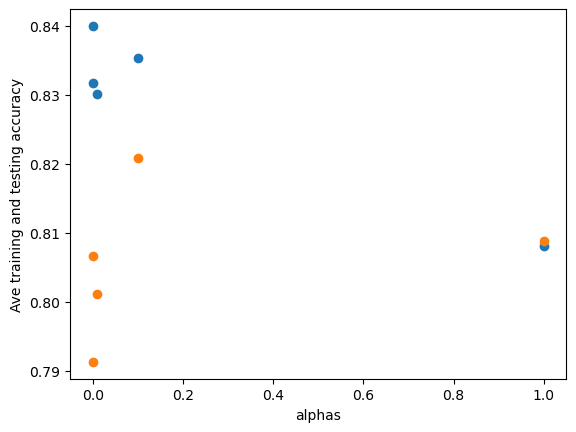

In [218]:
#8
ave_train, ave_test = itr_nn_alpha(alphas)
    
plt.scatter(x = alphas, y = ave_train)
plt.scatter(x = alphas, y = ave_test)
plt.xlabel('alphas')
plt.ylabel('Ave training and testing accuracy')

Increasing the alpha value leads to a decrease in the gap between training and testing accuracy, which helps prevent overfitting, as it converges. The non-regularized model above used a default alpha value of 0.0001, which caused the most significant overfitting. The alpha value of 0.0001 produced the highest training/testing accuracy, but it also led to the most significant overfitting.

## Running SVMs

Now lets experiment with SVMs.  

9. __BEFORE RUNNING ANY CODE__, predict which kernel function (linear, rbf, sigmoid, or polynomial) you think will perform the best. Use your figure from step 2 to help you decide. 


10. For each kernel method, train an SVM model and report the average training and test accuracy. Was your prediction correct? Which method peformed the best? 


11. Now plot the decision boundaries for each kernel method and identify the support vectors on your plot. You should have four plots in total for this question. [This tutorial](https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea) has code that will help you do this. What do these figures tell you about the different kernel methods? Which do you think fit the data the best? Does this match your answer in question 10? 


12. Compare your SVM performance with your Neural Netowrk performance. Which perfomed better? Which was more prone to overfitting? What does this tell you about when to use each model? 

In [219]:
#code goes here 
#9

Based on the figure in step 2, I think that the linear kernel function would perform the best, as it appears to generate a simple decision boundary that separates the two labels clearly with minimizing overfitting.

In [220]:
#10
kernels = ['linear', 'rbf', 'sigmoid', 'poly']

def svms(kernels):
    ave_train = []
    ave_test = []
    for k in kernels:
        train_score = []
        test_score = []
        for i in range(15):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
            clf = svm.SVC(kernel = k)
            clf.fit(X_train, y_train)
            train_score.append(clf.score(X_train, y_train)) 
            test_score.append(clf.score(X_test, y_test))
        ave_train.append((np.sum(train_score) / len(train_score)))
        ave_test.append((np.sum(test_score) / len(test_score)))
    return ave_train, ave_test

ave_train, ave_test = svms(kernels)
for i in range(4):
    print("kernel = " + kernels[i])
    print("Training Accuracy: " + str(ave_train[i]))
    print("Testing Accuracy: " + str(ave_test[i]))
    print()

kernel = linear
Training Accuracy: 0.8539944903581268
Testing Accuracy: 0.839344262295082

kernel = rbf
Training Accuracy: 0.671900826446281
Testing Accuracy: 0.6502732240437159

kernel = sigmoid
Training Accuracy: 0.5438016528925619
Testing Accuracy: 0.5431693989071038

kernel = poly
Training Accuracy: 0.6865013774104683
Testing Accuracy: 0.6655737704918033



My prediction was fairly correct, as the linear kernel method outperformed all other kernel methods.

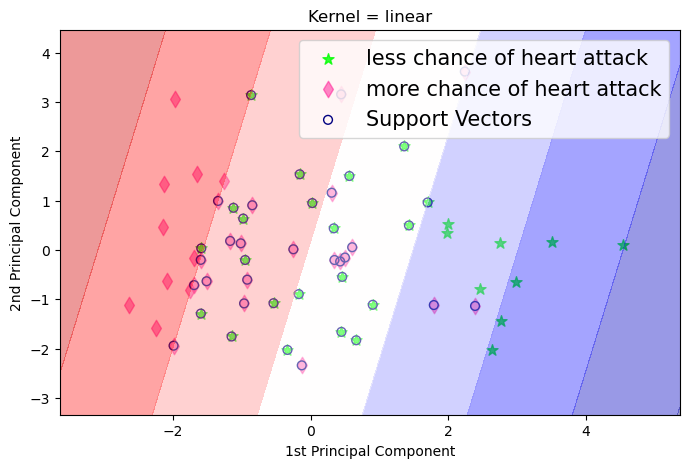

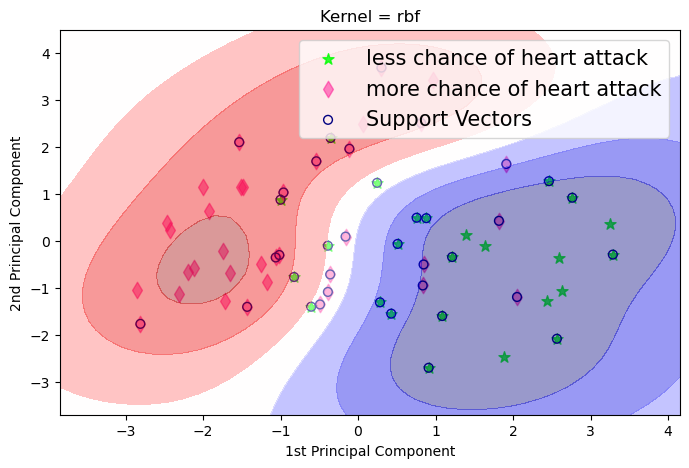

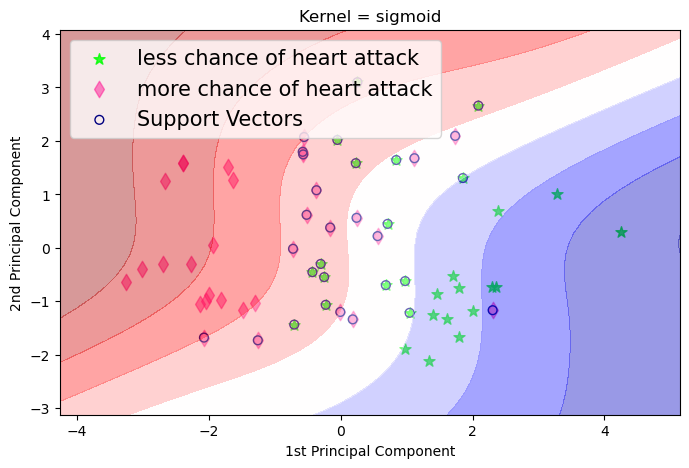

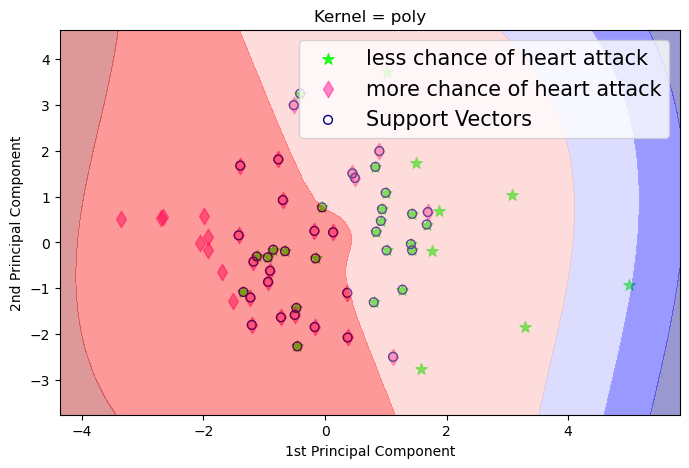

In [221]:
#11
for k in kernels:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler1 = StandardScaler()
    scaler1.fit(X_test)
    X_test_scaled = scaler1.transform(X_test)

    pcal = PCA(n_components = 2)
    X_test_scaled_reduced = pcal.fit_transform(X_test_scaled)

    svm_model = svm.SVC(kernel = k)
    classify = svm_model.fit(X_test_scaled_reduced, y_test)

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    def make_meshgrid(x, y, h = .2):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max ,h),
                             np.arange(y_min, y_max, h))
        return xx, yy

    X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig, ax = plt.subplots(figsize = (8, 5))
    fig.patch.set_facecolor('white')
    cdict1 = {0: 'lime', 1: 'deeppink'}

    Y_tar_list = y_test.tolist()
    yl1 = [int(target1) for target1 in Y_tar_list]
    labels1 = yl1

    labl1 = {0: 'less chance of heart attack', 1: 'more chance of heart attack'}
    marker1 = {0:'*', 1:'d'}
    alpha1 = {0:.8, 1:0.5}

    for l1 in np.unique(labels1):
        ix1 = np.where(labels1==l1)
        ax.scatter(X0[ix1],X1[ix1], c = cdict1[l1], label = labl1[l1], s=70, marker = marker1[l1], alpha = alpha1[l1])

    ax.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:, 1], s = 40, facecolors = 'none', edgecolors = 'navy', label = 'Support Vectors')
    plot_contours(ax, classify, xx, yy, cmap = 'seismic', alpha = 0.4)
    plt.legend(fontsize = 15)

    plt.xlabel("1st Principal Component")
    plt.ylabel("2nd Principal Component")
    plt.title("Kernel = " + k)

    plt.savefig('ClassifyMalignant_Benign2D_Decs_Funct.png', dpi = 300)
    plt.show()

By examining the figures of decision boundaries, we can assess the quality of the separation between two classes and determine if there is any overlap between them. For instance, compared to other methods, the linear kernel method is more likely to produce a clear boundary that clearly separates the two classes in their respective areas, thereby reducing the likelihood of overlap. Next, we can also examine the number of support vectors to determine if the model is overfitting or underfitting the training data. A large number of support vectors may indicate overfitting, while a small number may imply underfitting. Unsurprisingly, the linear kernel method tends to have the fewest support vectors, indicating that it may be less susceptible to both underfitting and overfitting compared to the other kernel methods. Therefore, based on the decision boundaries and the number of support vectors, the linear kernel method appears to be the best fit for the data. This result is consistent with the prediction made in the previous question.

In [222]:
#12

Based on the results so far, it appears that Neural Network is more prone to overfitting compared to SVM. Furthermore, not only did SVM significantly outperform the Neural Network, but the Neural Network also had a higher potential of overfitting, particularly when the model was not generalized. Therefore, depending on the specific problems and data, we may choose to use Neural Network when handling large amounts of data and SVM when handling smaller to moderate amounts of data with a high degree of dimensionality. In general, we should try both SVM and Neural Network on a given problem and compare their performance to determine which is more suitable. It is also important to consider carefully tuning the hyperparameters and regularization methods for each model to prevent overfitting and achieve ideal performance.